In [1]:
## IMPORT LIBRARY ##
from summa import keywords # !pip install summa
import json
from nltk.tokenize import wordpunct_tokenize
import string
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
## STOPWORDS ##
f = open("stopwords.txt", "r")
stopwords = []
for x in f:
    stopwords.append(x.splitlines()[0])
stopwords

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [3]:
## FUNCTION LIST ARTICLE ##
def list_article(namefile, record, content):
    # Membaca file json #
    with open(namefile, encoding='utf-8') as myfile:
        data = json.load(myfile)
    
    # Output list artikel #
    dataArticle = []
    
    # Mendapat data artikel dari file json #
    for j in range(len(data[record])):
        # Mendapat isi text dari artikel #
        tempText = data[record][j][content]
        text = ''        
        for i in tempText:
            text = text + i
        # Append text ke list artikel #
        if (text.isspace() == False):
            if (len(text) > 400) :
                dataArticle.append(text)

    return dataArticle

In [4]:
## FUNCTION CLEAN ARTICLE ##
def clean_text(text):
    data_cleanArticle = []
    for i in range(len(text)):
        # Tokenize #
        resultTokenize = wordpunct_tokenize(text = text[i])
        # Menghapus punctuation #
        resultTokenize = [result for result in resultTokenize if result not in list(string.punctuation)]
        ' '.join(resultTokenize)
        # Menghilangkan kata yang ada di stopwords dari text #
        resultText = [result for result in resultTokenize if result not in stopwords]
        strText = ""
        # Mengambil text yang sudah dibersihkan #
        for content in resultText:
            strText = strText + content + " "
        # Append data text yg sudah dibersihkan #
        data_cleanArticle.append(strText)
    
    return data_cleanArticle

In [5]:
## FUNCTION KEYWORD ##
def listKeyword(data):
    # Inisiasi list data keywords #
    dataKeyword = []
    # Mendapat keywords dari semua data artikel #
    for i in range(len(data)):
        # Mendapat keywords #
        key = keywords.keywords(data[i])
        key = key.splitlines()
        dataKeyword.append(key)
    return dataKeyword

In [6]:
## FUNCTION TOP KEYWORD ##
def topKeyword(data, top):
    dataKeyword = []
    # Mendapat keywords dari artikel #
    key = keywords.keywords(data)
    key = key.splitlines()
    # Mendapat keywords top x #
    for i in range(top):
        dataKeyword.append(key[i])
        
    return dataKeyword

1. TP adalah True Positive, yaitu jumlah data positif yang terklasifikasi dengan benar oleh sistem.
2. TN adalah True Negative, yaitu jumlah data negatif yang terklasifikasi dengan benar oleh sistem.
3. FN adalah False Negative, yaitu jumlah data negatif namun terklasifikasi salah oleh sistem.
4. FP adalah False Positive, yaitu jumlah data positif namun terklasifikasi salah oleh sistem

$ Presisi = \frac{TP}{FP + TP} $

$ Recall = \frac{TP}{FN+TP} $

$ Akurasi = \frac{TP+TN}{TP+TN+FP+FN} $

$ fmeasure = 2x\frac{presisixrecall}{presisi+recall} $

In [7]:
## FUNCTION EVALUATE TEXTRANK #
def evaluate_textrank(list_article, list_keyword, top):
    j=0
    total_precision=0
    total_recall=0
    total_accuracy=0
    
    for article in list_article:
        # Mendapat keywords dari top x #
        key = topKeyword(article, top)
        # Mendapat panjang list keywords data awal #
        num_manual_keywords = len(list_keyword[j])
        # Inisiasi TP dan TN #
        TP=0
        TN=0
        # Mendapat nilai TP dan TN #
        for i in range(0, min(top,len(key))):
            if key[i] in set(list_keyword[j]):
                TP += 1
            if key[i] not in set(list_keyword[j]):
                TN += 1   
        # Mendapat nilai FP dan FN #        
        FP = len(key) - TP
        FN = num_manual_keywords - TP
        # Mendapat nilai presisi, recall, akurasi setiap keywords dari artikel #       
        total_precision += TP/float(len(key))
        total_recall += TP/float(num_manual_keywords)
        total_accuracy += (TP + TN) / (float(TP+TN+FP+FN))
        j=j+1
    # Mendapat nilai rata2 presisi, recall, akurasi, dan fmeasure #
    avg_precision = round(total_precision/float(len(list_article)), 2)
    avg_recall = round(total_recall/float(len(list_article)), 2)
    avg_fmeasure = round(2*avg_precision*avg_recall/(avg_precision + avg_recall), 2)
    avg_accuracy = round(total_accuracy/float(len(list_article)), 2)

    return (print("Precision", avg_precision, "Recall", avg_recall, "F-Measure", avg_fmeasure, "accuracy", avg_accuracy))

In [8]:
# Dara artikel #
dataArticle = list_article('articles.json', 'RECORDS', 'contentRaw')

In [9]:
# Data artikel yg sudah dibersihkan #
data_cleanArticle = clean_text(dataArticle)

In [10]:
# Data keywords #
dataKeyword = listKeyword(data_cleanArticle)

In [12]:
# Mengambil data test untuk evaluasi summa #
test_article = []
test_keyword = []
for i in range(len(dataKeyword)):
    if (len(dataKeyword[i])>=15):
        tempK = topKeyword(data_cleanArticle[i], 15)
        test_article.append(data_cleanArticle[i])
        test_keyword.append(tempK)        

In [13]:
test_keyword[0]

['ivan',
 'pemilu',
 'utara',
 'terdakwa',
 'hukum',
 'jakarta',
 'ancol',
 'tindak',
 'bawaslu',
 'sh',
 'umum',
 'suara',
 'pemungutan',
 'tuntutan',
 'kpps']

In [14]:
# Evaluasi summa text rank #
evaluate_textrank(test_article, test_keyword, 10)

Precision 1.0 Recall 0.67 F-Measure 0.8 accuracy 0.67


In [15]:
df = pd.DataFrame({'article': data_cleanArticle, 'keyword': dataKeyword})
df

,article,keyword
0,RI menyelesaikan pleno hasil penghitungan suar...,"[suara, pleno, pdip, kpu, posisi, nasdem, golk..."
1,Ivan Valentino terdakwa pencekikan petugas Kel...,"[ivan, pemilu, utara, terdakwa, hukum, jakarta..."
2,Nama Tim Mawar mencuat publik terkait peristiw...,"[tim, mawar, ryamizard, kerusuhan, moeldoko, n..."
3,Dua mantan jurnalis Subairi Soeprayitno resmi ...,"[kpu, anam, terpilih, pelantikan, komisioner, ..."
4,Tim Kampanye Daerah () Jawa Timur menanggapi s...,"[dahlan, prabowo, machfud, pak, jokowi, jatim,..."
...,...,...
3756,Wasekjen PKB Daniel Johan calon pemilih golput...,"[pkb, daniel, pilihan, memenangkan, pemilu, ca..."
3757,BMKG mencabut peringatan tsunami akibat Situas...,"[rumah, masyarakat, dwikorita, kerusakan, bmkg..."
3758,hadir pidato kebangsaan Prabowo Subianto Surab...,"[prabowo, gatot, sudirman, tokoh, pidato keban..."
3759,Seorang bocah SD berinisial W 8 Belitung Timur...,"[korban, belitung, mandi danau, masyarakat, ra..."


In [16]:
## FUNCTION DISPLAY WORD CLOUD ##
# display 1 artikel #
def display_spesific(text, i):
    strT = ""
    for contentText in text[i]:
        strT = strT + contentText + ", "
    
    wordcloud = WordCloud().generate(strT)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()  

# display semua artikel #
def display_general(text):
    strT = ""
    for i in range(len(text)):
        for j in range(len(text[i])):
            strT = strT  + text[i][j] + ", "
    
    wordcloud = WordCloud().generate(strT)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()  

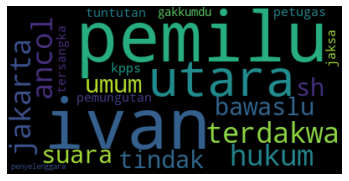

In [17]:
display_spesific(dataKeyword, 1)

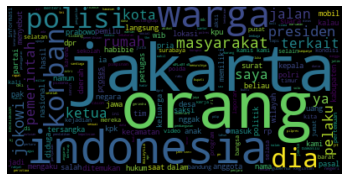

In [18]:
display_general(df['keyword'])